# Results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import scipy.stats
import re
import os
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

In [5]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [6]:
# base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

## A. MS1 Spectra in ToppView

## B. CentWave

Load mzML in peak picking, and see if the same peaks are picked again.

![title](img/placeholder.png)

Boxplot comparing the intensity and number of peaks per scan distributions of MS1 peaks in the simulator vs picked peaks.
- X-axis: samples
- Y-axis: log_2 intensity

In [7]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\extracted_peaks_ms1.csv'))

In [8]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]

In [9]:
intensity_col = 'maxo'
df = df[(df['rt'] > rt_range[0][0]) & (df['rt'] < rt_range[0][1])]
df = df[(df['rt'] > mz_range[0][0]) & (df['rt'] < mz_range[0][1])]
df = df[(df[intensity_col] > min_ms1_intensity)]
df['log_intensity'] = df.apply(lambda row: np.log(row[intensity_col]), axis=1)

In [10]:
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename,log_intensity
200,128.953466,128.953430,128.953506,193.483,165.756,215.408,6.641639e+07,6.608331e+07,1.948148e+06,112,1,0,1,Beer_multibeers_1_fullscan1.mzML,14.482390
223,402.271539,402.271179,402.272064,204.018,198.778,212.928,1.719215e+06,1.719202e+06,2.516077e+05,251607,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.435626
238,321.196281,321.196045,321.196533,210.280,204.018,215.408,1.868589e+06,1.867575e+06,3.243222e+05,215,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.689493
240,365.222356,365.221771,365.222687,210.280,202.760,216.687,1.750961e+06,1.748449e+06,2.863134e+05,136,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.564842
242,275.163879,275.163757,275.164032,205.268,197.513,211.521,4.486897e+06,4.471453e+06,5.350006e+05,93,1,0,1,Beer_multibeers_1_fullscan1.mzML,13.190023


In [11]:
def make_boxplot(df, x, y, xticklabels, title):
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [12]:
def make_hist(df, col_name, file_name, title):
    gb = df.groupby('filename')
    group_df = gb.get_group(file_name)
    vals = group_df[col_name].values
    print(vals, len(vals))
    _ = plt.hist(vals, bins=100)
    plt.title(title)
    plt.tight_layout()
    plt.show()

Plot MS1 features

In [13]:
df.groupby('filename').count()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_12_fullscan1.mzML,975,975,975,975,975,975,975,975,975,975,975,975,975,975
Beer_multibeers_18_fullscan1.mzML,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Beer_multibeers_1_fullscan1.mzML,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721
Beer_multibeers_6_fullscan1.mzML,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614
no_noise_ms1_controller.mzML,3718,3718,3718,3718,3718,3718,3718,3718,3718,3718,3718,3718,3718,3718
noisy_ms1_controller.mzML,4864,4864,4864,4864,4864,4864,4864,4864,4864,4864,4864,4864,4864,4864


In [14]:
df.groupby('filename').median()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_12_fullscan1.mzML,235.143884,235.143860,235.143906,720.150000,713.865000,726.494000,7.052825e+06,6.876543e+06,678254.81250,85.0,2.0,0.0,1.0,13.427278
Beer_multibeers_18_fullscan1.mzML,261.111910,261.111816,261.112030,440.726000,430.657000,449.635000,6.520123e+06,6.382879e+06,732490.50000,51.0,3.0,0.0,1.0,13.504206
Beer_multibeers_1_fullscan1.mzML,246.097181,246.096970,246.097321,514.102000,505.389000,525.598000,6.463699e+06,6.341058e+06,675971.12500,47.0,1.0,0.0,1.0,13.423906
Beer_multibeers_6_fullscan1.mzML,267.108497,267.108337,267.108673,477.883000,469.013000,486.944000,5.824679e+06,5.701706e+06,602564.28125,53.0,4.0,0.0,1.0,13.308950
no_noise_ms1_controller.mzML,213.063689,213.063530,213.063904,515.170316,507.412610,522.785961,6.099584e+06,6.094738e+06,664304.53125,651934.0,5.0,0.0,1.0,13.406496
noisy_ms1_controller.mzML,218.136408,218.136124,218.136635,545.345213,536.178211,554.373555,5.117699e+06,5.113215e+06,546030.25000,535110.5,6.0,0.0,1.0,13.210430


[ 193.483  204.018  210.28  ...  916.207 1020.82   809.581] 5721


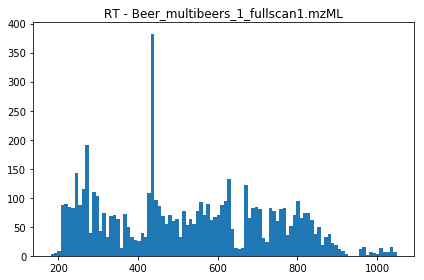

[ 185.44028791  186.68194243  189.32581501 ... 1039.02755687 1032.53377894
 1048.2977746 ] 3718


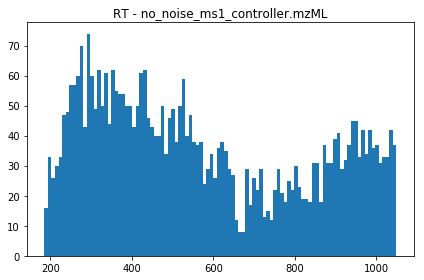

[ 186.27474581  188.8125202   186.27474581 ...  873.87607496 1010.90974286
  987.52257349] 4864


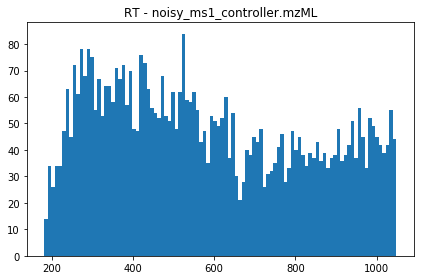

In [15]:
fname = 'Beer_multibeers_1_fullscan1.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

fname = 'no_noise_ms1_controller.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

fname = 'noisy_ms1_controller.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

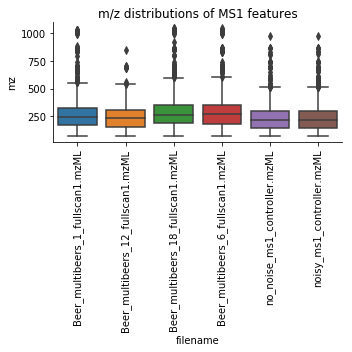

In [16]:
make_boxplot(df, 'filename', 'mz', None, 
             'm/z distributions of MS1 features')

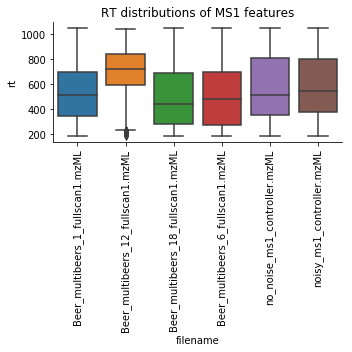

In [17]:
make_boxplot(df, 'filename', 'rt', None, 
             'RT distributions of MS1 features')

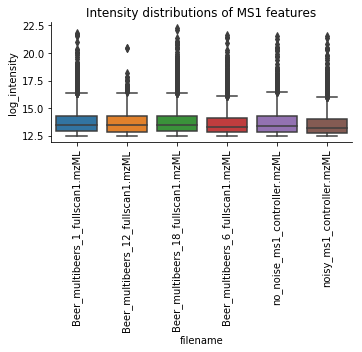

In [18]:
make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features')

## C. Top-N DDA Fragmentation Compared to the Real Data

**This should be plotted for the peak-picked data instead**

Load beer1pos file and run it through DDA controller.
- Boxplot of the number of MS1/MS2 peaks per scan of simulated vs original

In [32]:
def get_df(ds, data_type, filename, ms_level, controller, log=False):
    min_rt = 3*60
    max_rt = 21*60    
    observed_values = ds.get_data(data_type, filename, ms_level, max_data=1E8, min_rt=min_rt, max_rt=max_rt)
    
    simulated_values = []    
    if data_type == N_PEAKS:
        simulated_values = [scan.num_peaks for scan in controller.scans[ms_level]]
    elif data_type == RT:
        simulated_values = [scan.rt for scan in controller.scans[ms_level]]        
    elif data_type == MZ:
        for scan in controller.scans[ms_level]:
            if len(scan.mzs) > 0:
                simulated_values.extend(scan.mzs)
    elif data_type == INTENSITY:
        for scan in controller.scans[ms_level]:
            if len(scan.intensities) > 0:
                simulated_values.extend(scan.intensities)        
    simulated_values = np.array(simulated_values)
    
    if log:
        observed_values = np.log(observed_values)
        simulated_values = np.log(simulated_values)

    col1 = np.append(observed_values, simulated_values)
    col2 = np.append(np.array([0] * len(observed_values)), np.array([1] * len(simulated_values)))
    
    col1.astype(np.int)
    col2.astype(np.int)
    
    df = pd.DataFrame(np.stack([col1, col2], axis=1), columns=[data_type, 'filename'])
    return df

In [33]:
mzml_path = os.path.join(base_dir, 'Data\\multibeers_urine_data\\beers\\fragmentation')
ds = DataSource()
ds.load_data(mzml_path)

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_10_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_11_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_12_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_13_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_14_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_15_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS M

In [37]:
controller = load_obj(os.path.join(base_dir, 'Manuscript\\C. Top-N DDA Fragmentation Compared to the Real Data\\mzML\\experiment_N_10_rttol_15.p'))

In [38]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 1

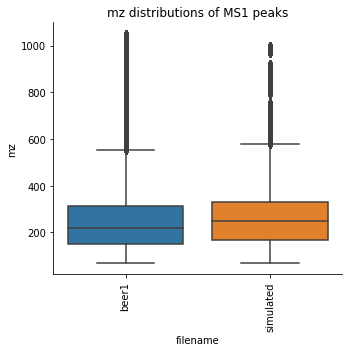

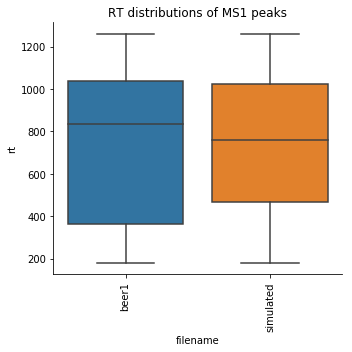

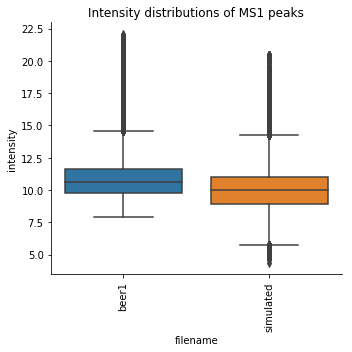

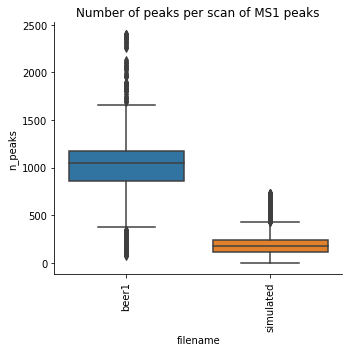

In [39]:
df = get_df(ds, MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(ds, RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(ds, INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(ds, N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

In [40]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 2

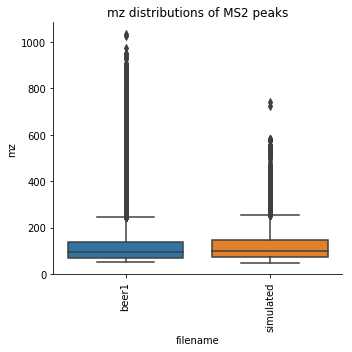

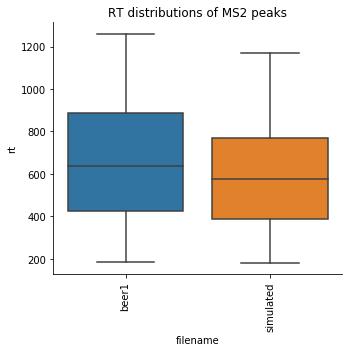

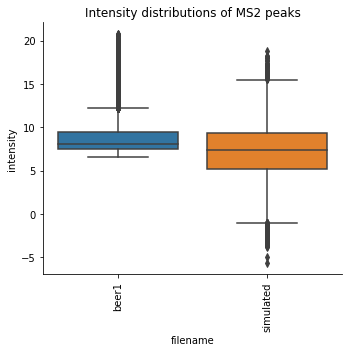

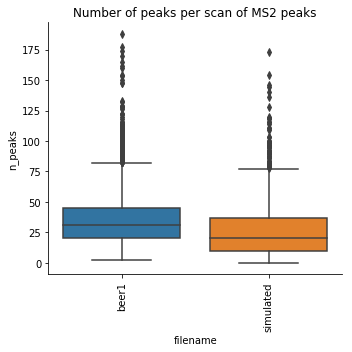

In [41]:
df = get_df(ds, MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(ds, RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(ds, INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(ds, N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

## D. Case Study 1: Varying N in top-N DDA fragmentation

Vary Ns from the data in C and plot the following for each N:
- Proportion of the original MS1 peaks that were fragmented
- Number of MS2 peaks that map to the original MS1 peak
- 3D plot of various values for Ns vs dynamic exclusion windows?
- Number of MS1 peaks that can be picked by XCMS CentWave

In [ ]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\D. Case Study 1 Varying N in top-N DDA fragmentation\\mzML\\extracted_peaks_ms1.csv'))

In [ ]:
df.head()

In [ ]:
df['log_intensity'] = df.apply(lambda row: np.log(row['into']), axis=1)

In [ ]:
def make_boxplot(df, x, y, xticklabels, title):
    plt.gcf().set_size_inches(15, 5)
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

In [ ]:
make_boxplot(df, 'filename', 'mz', None, 
             'mz distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'rt', None, 
             'rt distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features detected by CentWave')

In [ ]:
count_df = df.groupby('filename').size().reset_index(name='counts')

In [ ]:
# count_df['N'] = df.apply(lambda row: row.values, axis=1)

In [ ]:
arrays = []
for arr in count_df.values:
    N = arr[0].split('_')[2]
    arrays.append((arr[0], N, arr[1]))
arrays = np.array(arrays)

In [ ]:
df = pd.DataFrame(arrays, columns=['filename', 'N', 'count'])

In [ ]:
df['N'] = df['N'].apply(int)
df['count'] = df['count'].apply(int)

In [ ]:
df = df.sort_values('N')

In [ ]:
df.head()

In [ ]:
sns.lineplot(x='N', y='count', data=df)
plt.title('Number of MS1 features detected by CentWave')

## E. Case Study 2: Reproduce DIA results

![title](img/placeholder.png)

## F. Case Study 3: Reproduce DsDA results

Same as Table 1 in the DsDA paper:
- The percentage of all detected features that were sampled by MS/MS at least once.
- The percentage of all features detected in at least 20% of the injections that were sampled by MS/MS at least once.
- The total number of MS/MS events (absolute counts) that map to a feature

![title](img/capture1.png)

Same as Figure 1 in the DsDA paper:
- Create 20 samples, run them through DsDA with or without maxdepth.
- Figure 1. *Complex small-molecule sample injected 20 times using standard DDA (A), DsDA (B), or DsDA with the MaxDepth option enabled (C). Each panel contains a scatterplot in which each point represents an XCMS feature. All black points are plotted with sizes proportional to the number of times they were sampled for MS/MS (see legend). All points colored red remained unsampled at the end of the 20-injection sequence*

![title](img/capture2.png)